# STAR TYPE CLASSIFICATION

###  Files
* assignment_ds.csv - the training set
* test.csv - the test set
* sample_submission.csv - a sample submission file in the correct format

###  Inputs - Xs
* Temperature
* L: Relative Luminosity
* R: Relative Radius
* AM: Absolute Magnitude
* Color: General Color of Spectrum
* Spectral_Class: O,B,A,F,G,K,M / SMASS, please see https://en.wikipedia.org/wiki/Asteroid_spectral_types

###  Target - Y
 Type: Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants
 
from 0 to 5

* Red Dwarf - 0
* Brown Dwarf - 1
* White Dwarf - 2
* Main Sequence - 3
* Super Giants - 4
* Hyper Giants - 5

In [822]:
import pandas as pd
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from keras import optimizers
from numpy.random import seed
from numpy import array
from numpy import argmax
from keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import seaborn as sb
from sklearn.model_selection import train_test_split
from scipy import stats
from IPython.display import HTML, display

* As a first step we have to copy the data set assignment_ds.csv 

In [782]:
seed(10)
csv_file = 'assignment_ds.csv'
start = pd.read_csv(csv_file)
start[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.0773,17.08,Red,M,0
1,12098,689.000000,7.0100,0.02,Blue-white,A,3
2,2731,0.000437,0.0856,18.09,Red,M,0
3,37800,202900.000000,6.8600,-4.56,Blue,O,3
4,8570,0.000810,0.0097,14.20,Blue white,A,2
5,3605,126000.000000,1124.0000,-10.81,Red,M,5
6,8052,8.700000,1.8000,2.42,Whitish,A,3
7,3574,200000.000000,89.0000,-5.24,Red,M,4
8,8829,537493.000000,1423.0000,-10.73,White,A,5
9,3625,74000.000000,876.0000,-10.25,Red,M,5


* Afterwards, the data is cleaned because the following steps only work with numbers and our dataset has numerical variables and strings.

* For this purpose, each string is assigned a number as follows:
 * For Colors
    - Blue = 1
    - Blue-white = 2
    - Blue White = 2
    - Blue white = 2
    - Blue-White = 2
    - Orange = 4
    - Orange-Red = 5
    - Pale yellow orange = 6
    - Red = 7
    - White = 8
    - white = 8
    - White-Yellow = 9
    - Whitish = 10
    - yellowish = 11
    - Yellowish = 11
    - yellowish-white = 12
    - Yellowish White = 12
    - yellow-white = 13
 * For Spectral Class
    - A = 1
    - B = 2
    - F = 3
    - G = 4
    - K = 5
    - M = 6
    - O = 7

In [783]:
def filtrar(df):
    df = pd.DataFrame(df) # Con los datos que tengas, haces la recogida de datos del df
    df.loc[(df['Color'] == 'Blue'), "Color_Num"] = 1
    df.loc[(df['Color'] == 'Blue-white'), "Color_Num"] = 2
    df.loc[(df['Color'] == 'Blue White'), "Color_Num"] = 2
    df.loc[(df['Color'] == 'Blue white'), "Color_Num"] = 2
    df.loc[(df['Color'] == 'Blue-White'), "Color_Num"] = 2
    df.loc[(df['Color'] == 'Orange'), "Color_Num"] = 4
    df.loc[(df['Color'] == 'Orange-Red'), "Color_Num"] = 5
    df.loc[(df['Color'] == 'Pale yellow orange'), "Color_Num"] = 6
    df.loc[(df['Color'] == 'Red'), "Color_Num"] = 7
    df.loc[(df['Color'] == 'White'), "Color_Num"] = 8
    df.loc[(df['Color'] == 'white'), "Color_Num"] = 8
    df.loc[(df['Color'] == 'White-Yellow'), "Color_Num"] = 9
    df.loc[(df['Color'] == 'Whitish'), "Color_Num"] = 10
    df.loc[(df['Color'] == 'yellowish'), "Color_Num"] = 11
    df.loc[(df['Color'] == 'Yellowish'), "Color_Num"] = 11
    df.loc[(df['Color'] == 'yellowish-white'), "Color_Num"] = 12
    df.loc[(df['Color'] == 'Yellowish White'), "Color_Num"] = 12
    df.loc[(df['Color'] == 'yellow-white'), "Color_Num"] = 13
    df.loc[(df['Spectral_Class'] == 'A'), "Spectral_Class_num"] = 1
    df.loc[(df['Spectral_Class'] == 'B'), "Spectral_Class_num"] = 2
    df.loc[(df['Spectral_Class'] == 'F'), "Spectral_Class_num"] = 3
    df.loc[(df['Spectral_Class'] == 'G'), "Spectral_Class_num"] = 4
    df.loc[(df['Spectral_Class'] == 'K'), "Spectral_Class_num"] = 5
    df.loc[(df['Spectral_Class'] == 'M'), "Spectral_Class_num"] = 6
    df.loc[(df['Spectral_Class'] == 'O'), "Spectral_Class_num"] = 7
    df.drop(columns=["Spectral_Class"], inplace=True)
    df.drop(columns=["Color"], inplace=True)
    df = df.rename(columns = {'Spectral_Class_num': 'Spectral_Class', 'Color_Num': 'Color'}, inplace = False)
    df.Spectral_Class = df.Spectral_Class.fillna(0)
    df.Color = df.Color.fillna(0)
    df.Spectral_Class = df.Spectral_Class.astype(np.int64)
    df.Color = df.Color.astype(np.int64)
    return df
start=filtrar(start)
start

,Temperature,L,R,A_M,Type,Color,Spectral_Class
0,3453,0.000621,0.07730,17.08,0,7,6
1,12098,689.000000,7.01000,0.02,3,2,1
2,2731,0.000437,0.08560,18.09,0,7,6
3,37800,202900.000000,6.86000,-4.56,3,1,7
4,8570,0.000810,0.00970,14.20,2,2,1
...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,2,2,2
196,19860,0.001100,0.01310,11.34,2,1,2
197,13023,998.000000,6.21000,-1.38,3,2,1
198,39000,204000.000000,10.60000,-4.70,3,1,7


It shows us a little more detailed information about our data set, such as what type of data is in it, how much it weighs, the number of columns and rows.

In [809]:
start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 59 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     200 non-null    int64  
 1   L               200 non-null    float64
 2   R               200 non-null    float64
 3   A_M             200 non-null    float64
 4   Type            200 non-null    int64  
 5   Color           200 non-null    int64  
 6   Spectral_Class  200 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 12.5 KB


Shows the index of each column

In [810]:
start.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Type', 'Color', 'Spectral_Class'], dtype='object')

See how many samples we have and how many columns.

In [811]:
start.shape

(200, 7)

This table shows some of the statistics of the data set, such as the number of elements, the average value, the minimum and maximum value, among others.

In [813]:
start.describe()

,Temperature,L,R,A_M,Type,Color,Spectral_Class
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,10471.270000,110831.008364,242.024626,4.330510,2.53000,5.145000,4.765000
std,9687.860618,183950.389865,522.091429,10.481154,1.69513,3.376534,2.109985
min,1939.000000,0.000080,0.008400,-11.920000,0.00000,1.000000,1.000000
25%,3428.750000,0.000817,0.098525,-6.206000,1.00000,2.000000,2.000000
50%,5868.000000,0.104500,0.797500,8.313000,2.50000,7.000000,6.000000
75%,14313.750000,198650.000000,48.750000,13.564250,4.00000,7.000000,6.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.00000,13.000000,7.000000


This is an axis level function and will draw the heat map on the currently active axes.

<AxesSubplot:>

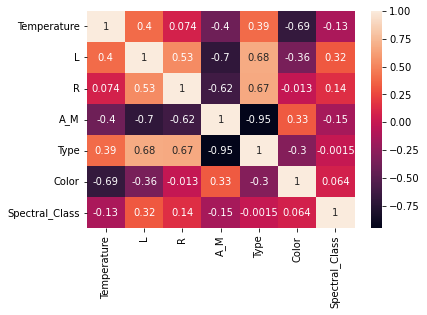

In [814]:
sb.heatmap(start.corr(),annot=True)

Here is a bar chart showing the distribution of the eletricals in each column. 

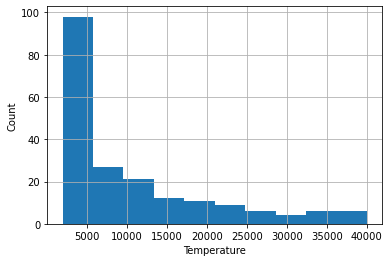

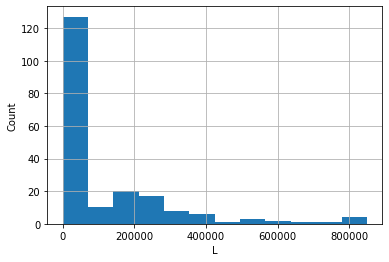

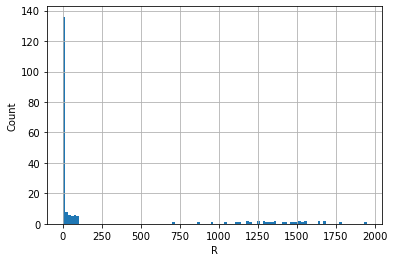

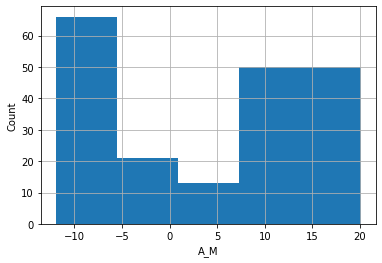

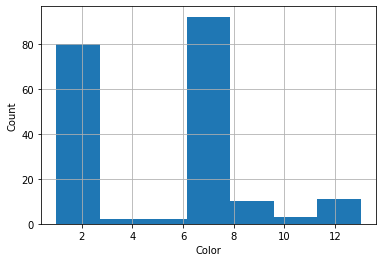

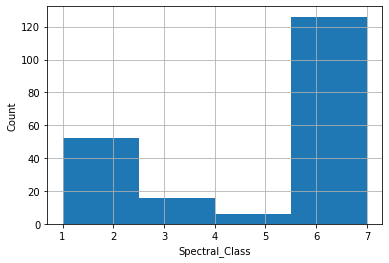

In [817]:
for feature in num_features:
    iqr = stats.iqr(start[feature], interpolation = 'midpoint')
    h = (2 * iqr) / (len(start[feature]) ** (1/3))
    bins = int(round((max(start[feature]) - min(start[feature])) / h))
    start[feature].hist(bins = bins)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In this part we are making a pairplots where we are comparing the elements of a column with another column in order to see the relationship between them.

<Figure size 600x400 with 0 Axes>

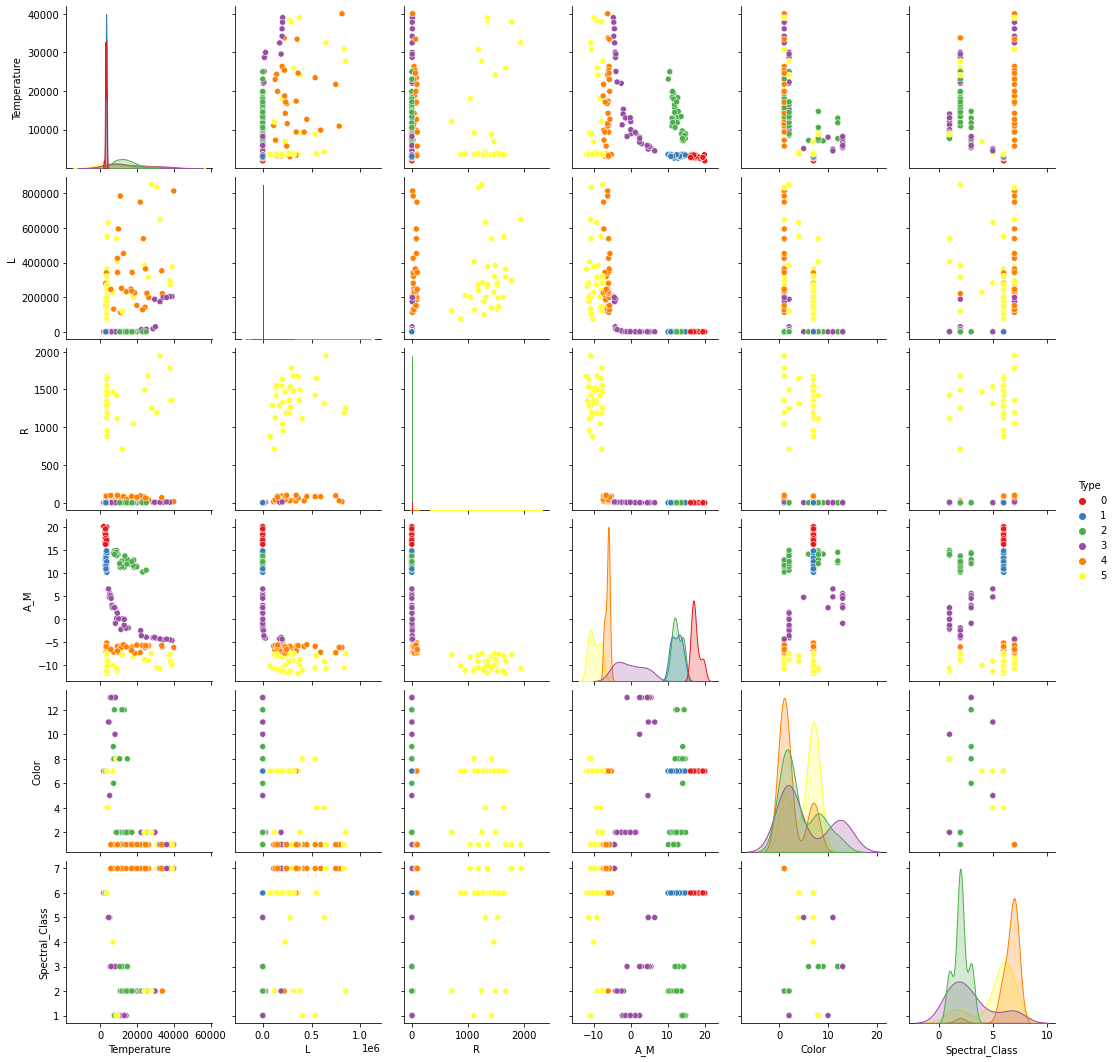

In [820]:
plt.figure(dpi=100)
sb.pairplot(start,hue='Type',palette='Set1',diag_kind='kde')

In this section the data is being mixed, that is to say, the data is being scrambled so that there is a certain percentage of randomness at the time of training the model.

The data set is then separated into two parts, one which will be the input where we will enter all the values with which the model will be trained and the other which is the target where the expected result will be placed.

In [786]:
# shuffle dataset
start = start.sample(frac=1)
inputs = start[['Temperature','L','R','A_M','Color','Spectral_Class']]
target = start[['Type']]
inputs

,Temperature,L,R,A_M,Color,Spectral_Class
59,3575,123000.000000,45.0000,-6.78,7,6
5,3605,126000.000000,1124.0000,-10.81,7,6
20,28700,16790.000000,6.4000,-4.09,2,2
198,39000,204000.000000,10.6000,-4.70,1,7
52,3042,0.000500,0.1542,16.60,7,6
...,...,...,...,...,...,...
113,2831,0.000231,0.0915,16.21,7,6
64,3834,272000.000000,1183.0000,-9.20,7,6
15,17200,0.000980,0.0150,12.45,2,2
125,3095,0.000190,0.4920,10.87,7,6


## Normalize Data

In this section we are normalizing the data set, i.e. we are transforming the values to a range between 0 and 1. 

In [821]:
# scale input data
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)
inputs[0:10]

,0,1,2,3,4,5
0,0.599347,1.816992e-09,0.000001,0.726248,0.000000,0.0
1,0.009299,9.752969e-10,0.000047,0.898873,0.666667,0.8
2,0.448287,1.707437e-03,0.003188,0.248309,0.111111,0.0
3,0.031909,7.161084e-09,0.000216,0.692754,0.666667,0.8
4,0.027602,1.482986e-09,0.000184,0.836393,0.666667,0.8
5,0.022577,1.816992e-09,0.000168,0.737520,0.666667,0.8
6,0.472757,1.179708e-03,0.003173,0.270209,0.111111,0.0
7,0.712561,3.319884e-01,0.637716,0.089855,0.111111,0.0
8,0.272431,2.271239e-01,1.000000,0.036393,0.111111,0.0
9,0.697227,1.937234e-09,0.000002,0.695008,0.000000,0.0


In [788]:
target.head()

,Type
59,4
5,5
20,3
198,3
52,0


In this section we are transforming the target to a value of 0 and 1 to facilitate its processing and subsequent learning and this is done so that when the model makes a prediction it has a minimum error.

In [789]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)

target.head()

C:\Users\josec\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In this section we are separating the data set into two parts, one part which is going to be the training set and the other which is going to be the test set.

The training set is in charge of training the model.

The test set is in charge of validating the model that is being trained.

We have a train_size_percentage and a test_size_percentage which contain the amount of elements to be distributed for each of the sets, in this case for the treining it would be 80% of the data and for the test it would be 20% of the data.

In [790]:
## define training dataset size
ds_size = inputs.shape[0]
train_size_percentage = .8
test_size_percentage = .2

training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)

# get training data
input_training = inputs[:training_size]
target_training = target[:training_size]

# get test data
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]

# used during training
print('Training DS size:', input_training.shape[0])
print('Test DS size:', input_test.shape[0])

Training DS size: 160
Test DS size: 40


here you can see the data already normalized

In [791]:
print('inputs:')
print(inputs[:10])
print('target')
target[:10]

inputs:
          0             1         2         3         4         5
0  0.042984  1.448047e-01  0.023090  0.160725  0.500000  0.833333
1  0.043772  1.483365e-01  0.576852  0.034709  0.500000  0.833333
2  0.703108  1.976643e-02  0.003280  0.244841  0.083333  0.166667
3  0.973726  2.401639e-01  0.005436  0.225766  0.000000  1.000000
4  0.028980  4.944550e-10  0.000075  0.891807  0.500000  0.833333
5  0.017919  6.121824e-10  0.000046  0.773296  0.500000  0.833333
6  0.040750  3.178640e-01  0.780086  0.078799  0.500000  0.833333
7  0.039227  6.945916e-10  0.000093  0.902439  0.500000  0.833333
8  0.017367  3.767276e-10  0.000045  0.916823  0.500000  0.833333
9  0.020809  4.202868e-10  0.000040  0.938399  0.500000  0.833333
target


,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0


In this section we defined the neural network and ended up defining a model that will have 3 hidden layers each with 32 neurons and an output layer with 6 neurons, and an input layer of 32 neurons which receive 6 initial data. As shown in image 1

<td> <img src="././imag/img1.png" style="width: 250px;"/> </td>

In addition, other models were tested, such as neural networks with two layers and 16 neurons using the relu activator, models of 32 with relu activator and others, and the one with the best results is the one presented here.

Adam is being used as the optimizing function and mse is being used as the loss function.

For more details you can find the images of the mentioned models in the image folder.

In [792]:
model = models.Sequential()


model.add(layers.Dense(32, activation='relu', input_shape=(6,)))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(32, activation='softmax')) 
    
model.add(layers.Dense(6))

rmsprop = optimizers.RMSprop(learning_rate=0.1)

model.compile(optimizer="adam", loss='mse', metrics=[metrics.categorical_accuracy])

In this section the training is being performed, in which 400 iterations are performed in batches of 64 elements.

for the training we are sending the input_training which are the values to be trained with, target_training which are the expected values, the validation test which are the values to validate if the model works correctly, epochs is the number of times the model will be trained, batch the amount of data that will be processed simultaneously. 

In [793]:
num_epochs = 400
batch_size = 64

history = model.fit(input_training, target_training,
                            validation_data=(input_test, target_test),
                            epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/400
3/3 [==============================] - 0s 54ms/step - loss: 0.1669 - categorical_accuracy: 0.1625 - val_loss: 0.1641 - val_categorical_accuracy: 0.1750
Epoch 2/400
3/3 [==============================] - 0s 6ms/step - loss: 0.1645 - categorical_accuracy: 0.1625 - val_loss: 0.1618 - val_categorical_accuracy: 0.1750
Epoch 3/400
3/3 [==============================] - 0s 7ms/step - loss: 0.1622 - categorical_accuracy: 0.1625 - val_loss: 0.1597 - val_categorical_accuracy: 0.1750
Epoch 4/400
3/3 [==============================] - 0s 6ms/step - loss: 0.1601 - categorical_accuracy: 0.1625 - val_loss: 0.1577 - val_categorical_accuracy: 0.1750
Epoch 5/400
3/3 [==============================] - 0s 7ms/step - loss: 0.1580 - categorical_accuracy: 0.1625 - val_loss: 0.1557 - val_categorical_accuracy: 0.1750
Epoch 6/400
3/3 [==============================] - 0s 7ms/step - loss: 0.1561 - categorical_accuracy: 0.1625 - val_loss: 0.1538 - val_categorical_accuracy: 0.1750
Epoch 7/400
3/3 [====

3/3 [==============================] - 0s 6ms/step - loss: 0.0810 - categorical_accuracy: 0.6625 - val_loss: 0.0790 - val_categorical_accuracy: 0.6750
Epoch 52/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0796 - categorical_accuracy: 0.6625 - val_loss: 0.0775 - val_categorical_accuracy: 0.6750
Epoch 53/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0783 - categorical_accuracy: 0.6625 - val_loss: 0.0762 - val_categorical_accuracy: 0.6750
Epoch 54/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0770 - categorical_accuracy: 0.6625 - val_loss: 0.0749 - val_categorical_accuracy: 0.6750
Epoch 55/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0759 - categorical_accuracy: 0.6625 - val_loss: 0.0737 - val_categorical_accuracy: 0.6750
Epoch 56/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0747 - categorical_accuracy: 0.6625 - val_loss: 0.0727 - val_categorical_accuracy: 0.6750
Epoch 57/400
3/3 [===========

3/3 [==============================] - 0s 6ms/step - loss: 0.0447 - categorical_accuracy: 0.9250 - val_loss: 0.0433 - val_categorical_accuracy: 0.9750
Epoch 101/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0440 - categorical_accuracy: 0.9438 - val_loss: 0.0425 - val_categorical_accuracy: 0.9750
Epoch 102/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0432 - categorical_accuracy: 0.9438 - val_loss: 0.0415 - val_categorical_accuracy: 0.9500
Epoch 103/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0425 - categorical_accuracy: 0.9375 - val_loss: 0.0406 - val_categorical_accuracy: 0.9500
Epoch 104/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0417 - categorical_accuracy: 0.9375 - val_loss: 0.0398 - val_categorical_accuracy: 0.9500
Epoch 105/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0409 - categorical_accuracy: 0.9438 - val_loss: 0.0393 - val_categorical_accuracy: 0.9750
Epoch 106/400
3/3 [=====

Epoch 149/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0121 - categorical_accuracy: 0.9937 - val_loss: 0.0106 - val_categorical_accuracy: 1.0000
Epoch 150/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0116 - categorical_accuracy: 0.9937 - val_loss: 0.0104 - val_categorical_accuracy: 1.0000
Epoch 151/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0114 - categorical_accuracy: 0.9937 - val_loss: 0.0099 - val_categorical_accuracy: 1.0000
Epoch 152/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0110 - categorical_accuracy: 0.9937 - val_loss: 0.0097 - val_categorical_accuracy: 1.0000
Epoch 153/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0106 - categorical_accuracy: 0.9937 - val_loss: 0.0096 - val_categorical_accuracy: 1.0000
Epoch 154/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0104 - categorical_accuracy: 0.9937 - val_loss: 0.0090 - val_categorical_accuracy: 1.0000
Epoch 155/

Epoch 199/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0035 - categorical_accuracy: 0.9937 - val_loss: 0.0022 - val_categorical_accuracy: 1.0000
Epoch 200/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0034 - categorical_accuracy: 0.9937 - val_loss: 0.0021 - val_categorical_accuracy: 1.0000
Epoch 201/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0033 - categorical_accuracy: 0.9937 - val_loss: 0.0023 - val_categorical_accuracy: 1.0000
Epoch 202/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0034 - categorical_accuracy: 0.9937 - val_loss: 0.0023 - val_categorical_accuracy: 1.0000
Epoch 203/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0033 - categorical_accuracy: 0.9937 - val_loss: 0.0021 - val_categorical_accuracy: 1.0000
Epoch 204/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0033 - categorical_accuracy: 0.9937 - val_loss: 0.0021 - val_categorical_accuracy: 1.0000
Epoch 205/

3/3 [==============================] - 0s 6ms/step - loss: 0.0024 - categorical_accuracy: 0.9937 - val_loss: 0.0010 - val_categorical_accuracy: 1.0000
Epoch 248/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0024 - categorical_accuracy: 0.9937 - val_loss: 9.7924e-04 - val_categorical_accuracy: 1.0000
Epoch 249/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0024 - categorical_accuracy: 0.9937 - val_loss: 9.4910e-04 - val_categorical_accuracy: 1.0000
Epoch 250/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0023 - categorical_accuracy: 0.9937 - val_loss: 9.0729e-04 - val_categorical_accuracy: 1.0000
Epoch 251/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0024 - categorical_accuracy: 0.9937 - val_loss: 9.2344e-04 - val_categorical_accuracy: 1.0000
Epoch 252/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0023 - categorical_accuracy: 0.9937 - val_loss: 0.0010 - val_categorical_accuracy: 1.0000
Epoch 25

3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 6.7542e-04 - val_categorical_accuracy: 1.0000
Epoch 296/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 7.0136e-04 - val_categorical_accuracy: 1.0000
Epoch 297/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 6.9583e-04 - val_categorical_accuracy: 1.0000
Epoch 298/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 6.6516e-04 - val_categorical_accuracy: 1.0000
Epoch 299/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 7.5841e-04 - val_categorical_accuracy: 1.0000
Epoch 300/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 7.8581e-04 - val_categorical_accuracy: 1.0000


3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 6.3353e-04 - val_categorical_accuracy: 1.0000
Epoch 344/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 6.4106e-04 - val_categorical_accuracy: 1.0000
Epoch 345/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 6.3270e-04 - val_categorical_accuracy: 1.0000
Epoch 346/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 5.6831e-04 - val_categorical_accuracy: 1.0000
Epoch 347/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 5.4732e-04 - val_categorical_accuracy: 1.0000
Epoch 348/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 5.3332e-04 - val_categorical_accuracy: 1.0000


3/3 [==============================] - 0s 7ms/step - loss: 0.0021 - categorical_accuracy: 0.9937 - val_loss: 5.3855e-04 - val_categorical_accuracy: 1.0000
Epoch 392/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0021 - categorical_accuracy: 0.9937 - val_loss: 5.7544e-04 - val_categorical_accuracy: 1.0000
Epoch 393/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0021 - categorical_accuracy: 0.9937 - val_loss: 6.1973e-04 - val_categorical_accuracy: 1.0000
Epoch 394/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 5.7513e-04 - val_categorical_accuracy: 1.0000
Epoch 395/400
3/3 [==============================] - 0s 8ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 5.5805e-04 - val_categorical_accuracy: 1.0000
Epoch 396/400
3/3 [==============================] - 0s 7ms/step - loss: 0.0022 - categorical_accuracy: 0.9937 - val_loss: 5.3519e-04 - val_categorical_accuracy: 1.0000


in this part the loss and accuraccy data are being extracted for further analysis.

In [794]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']

the graph shows that the model has a very low loss or error and that it is comparing the results obtained in the training with the tests performed.

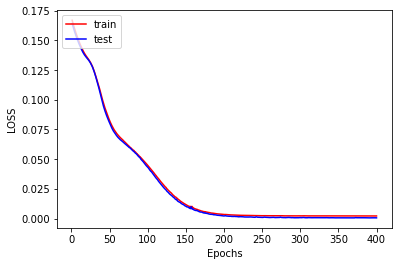

In [795]:
# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

in this graph it can be seen that the level of accuracy is quite high, almost reaching 1, which is the highest value that can be obtained.

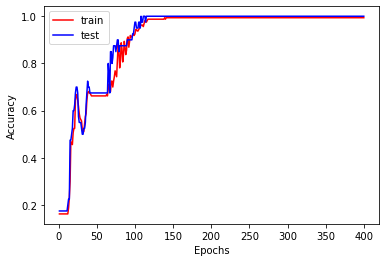

In [796]:
# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In this section we will proceed to the validation of the model with a different data set than the one used at the time of training the model.

the following steps are the same as those followed when filtering the data set and normalizing the data set

In [823]:
csv_file = 'test_ds.csv'
test = pd.read_csv(csv_file)


In [798]:
test=filtrar(test)


In [799]:
test.shape

(39, 6)

In [800]:
# shuffle dataset
#test = test.sample(frac=1)
inputs = test[['Temperature','L','R','A_M','Color','Spectral_Class']]

In [801]:
# scale input data
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs1 = pd.DataFrame(x_scaled)
inputs1

,0,1,2,3,4,5
0,0.599347,1.816992e-09,0.000001,0.726248,0.000000,0.0
1,0.009299,9.752969e-10,0.000047,0.898873,0.666667,0.8
2,0.448287,1.707437e-03,0.003188,0.248309,0.111111,0.0
3,0.031909,7.161084e-09,0.000216,0.692754,0.666667,0.8
4,0.027602,1.482986e-09,0.000184,0.836393,0.666667,0.8
5,0.022577,1.816992e-09,0.000168,0.737520,0.666667,0.8
6,0.472757,1.179708e-03,0.003173,0.270209,0.111111,0.0
7,0.712561,3.319884e-01,0.637716,0.089855,0.111111,0.0
8,0.272431,2.271239e-01,1.000000,0.036393,0.111111,0.0
9,0.697227,1.937234e-09,0.000002,0.695008,0.000000,0.0


in this part you are entering the data set values already normalized to the previously trained model. 



In [802]:
#predict
predictions_targets = model.predict(inputs1)

predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
predicted

array([2, 0, 3, 1, 1, 1, 3, 5, 5, 2, 4, 2, 3, 0, 0, 4, 2, 5, 1, 3, 1, 5,
       4, 4, 0, 1, 0, 5, 3, 4, 3, 3, 0, 5, 0, 1, 4, 0, 1], dtype=int64)

In [803]:
df = pd.DataFrame({'predicted': predicted})
df.to_csv("sample_submission1.csv")
df

,predicted
0,2
1,0
2,3
3,1
4,1
5,1
6,3
7,5
8,5
9,2
